In [2]:
import pickle
import os
import cv2
import matplotlib.pyplot as plt

from KNN_algorithm import KnnClassifier
from utilities_algorithms import get_xy,divide_into_correct_and_incorrect, draw_confusion_matrix, show_classified
from sklearn.metrics import accuracy_score, confusion_matrix

plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

## Load training data and data set

In [3]:
# load images
def load_images_from_folder(folder,color):
    images = {}
    for cdata in os.listdir(folder):
        # prevent to read something like .DS_store
        if cdata.startswith('.'):
            continue
        current_class = []
        path = folder + "/" + cdata
        for file in os.listdir(path):
            # prevent to read something like .DS_store
            if file.startswith('.'):
                continue
            image = cv2.imread(path + "/" + file)
            if color == 'gray':
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            else:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is not None:
                current_class.append(image)
        images[cdata] = current_class
    return images
c

# Read from directory
train_set  = load_images_from_folder('COMP338_Assignment1_Dataset/Training',color='gray')
test_set = load_images_from_folder('COMP338_Assignment1_Dataset/Test',color='gray')
test_set_rgb = load_images_from_folder('COMP338_Assignment1_Dataset/Test',color='rgb')

In [4]:
# load histogram of SIFT feature for training and test set
with open('Models/histograms/train_histogram.pkl', 'rb') as f:
    train_histogram = pickle.load(f)
with open('Models/histograms/test_histogram.pkl', 'rb') as f:
    test_histogram = pickle.load(f)
# load visual words
with open('Models/visual_words.pkl', 'rb') as f:
    words = pickle.load(f)

# Step 6: Replace the L2 distances with the histogram intersection

In [7]:
# Giving labels to train set and test set
train_x, train_y = get_xy(train_histogram)
test_x, test_y = get_xy(test_histogram)

# Perform KNN by histogram intersection
knn = KnnClassifier(k=1, dis_type='inter')
knn.fit(train_x, train_y)
predict_y_inter = knn.predict(test_x)
predict_y_inter

array(['cars', 'faces', 'cars', 'faces', 'cars', 'airplanes', 'cars',
       'faces', 'dog', 'dog', 'cars', 'cars', 'dog', 'airplanes', 'dog',
       'dog', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'dog',
       'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'dog', 'cars',
       'faces', 'cars', 'dog', 'faces', 'faces', 'faces', 'airplanes',
       'cars', 'faces', 'airplanes', 'keyboard', 'keyboard', 'cars',
       'keyboard', 'keyboard', 'keyboard', 'faces', 'keyboard',
       'keyboard'], dtype='<U9')

In [6]:
correct_inter, incorrect_inter = divide_into_correct_and_incorrect(list(test_set.keys()),test_y, predict_y_inter)

# Calculate accuracy
print('--------------------------------------')
inter_score = accuracy_score(test_y, predict_y_inter)
print(f"The average of predication based on Histogram Intersection KNN for all classes is {inter_score}")
for key, value in correct_inter.items():
    print(f"The average of predication based on Histogram Intersection KNN for class {key} is {len(value)/len(test_set[key])}")

--------------------------------------
The average of predication based on Histogram Intersection KNN for all classes is 0.48
The average of predication based on Histogram Intersection KNN for class airplanes is 0.1
The average of predication based on Histogram Intersection KNN for class dog is 0.3
The average of predication based on Histogram Intersection KNN for class cars is 0.8
The average of predication based on Histogram Intersection KNN for class faces is 0.5
The average of predication based on Histogram Intersection KNN for class keyboard is 0.7


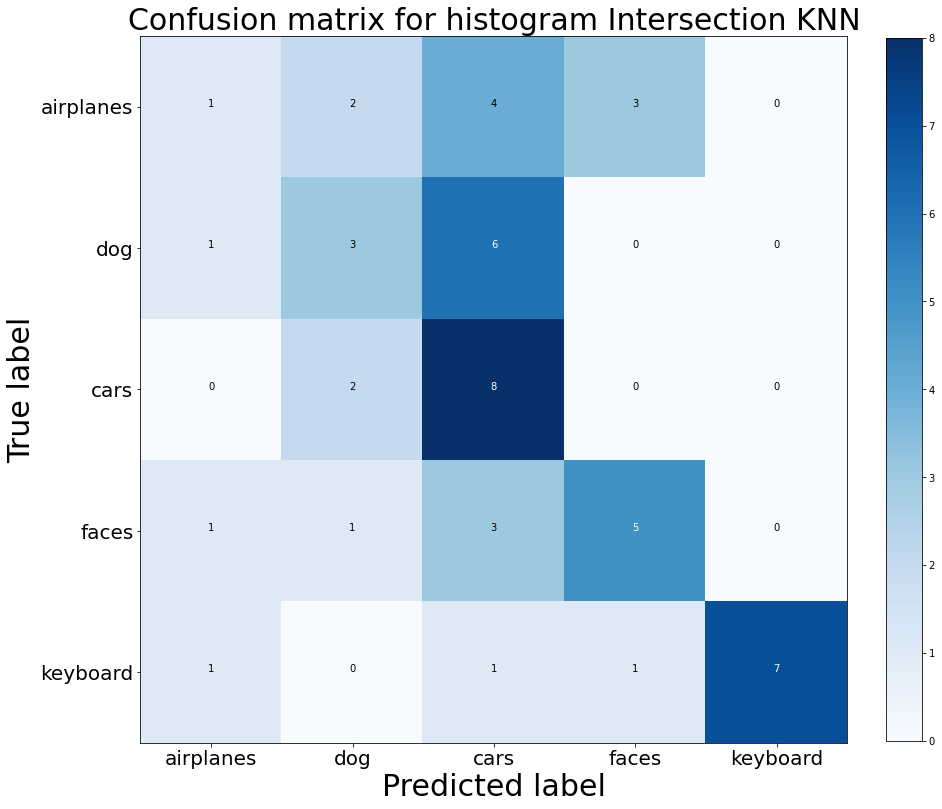

In [8]:
# Calculate Confusion matrix
cm_inter = confusion_matrix(test_y, predict_y_inter, labels=list(test_histogram.keys()))
draw_confusion_matrix(cm_inter, 'Confusion matrix for histogram Intersection KNN', list(test_histogram.keys()))

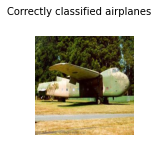

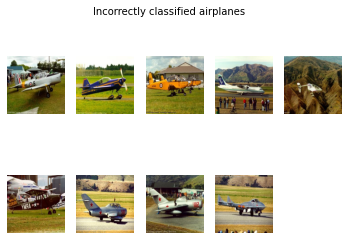

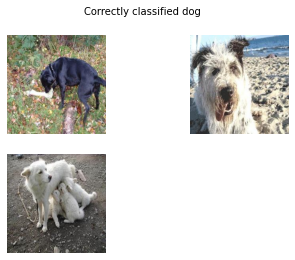

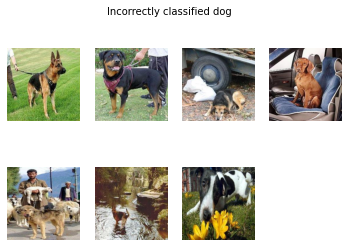

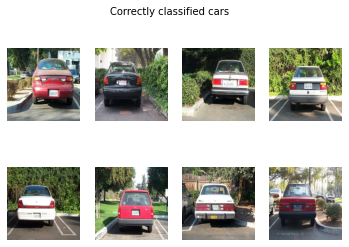

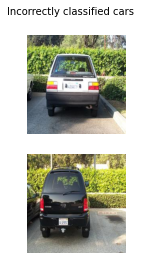

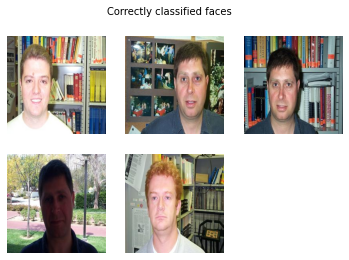

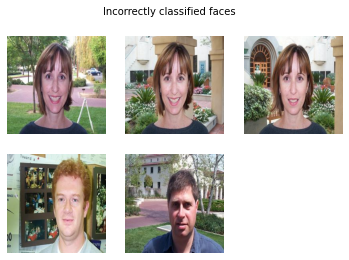

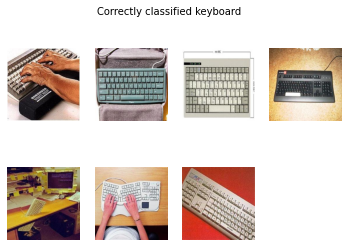

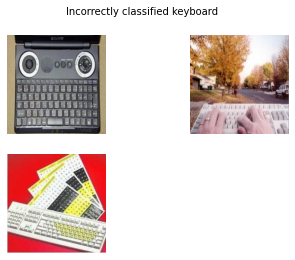

In [9]:
correct_inter, incorrect_inter = divide_into_correct_and_incorrect(list(test_set.keys()),test_y, predict_y_inter)
show_classified(test_set_rgb, correct_inter, incorrect_inter)